### Hackaton: Agentic Solution

We propose to create a multi-agent solution.

The solution will integrate the following agents:

1. Supervisor
2. Chat assistant
3. Text generation
4. Image generation
5. Diagram generation

In [1]:
# Call LLM
from langchain_openai.chat_models.azure import AzureChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
import os

llm = AzureChatOpenAI(
    openai_api_version=os.environ["AZURE_OPENAI_API_VERSION"],
    azure_deployment=os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"],
)

In [3]:
# dummy functions

def generate_text(query: str) -> str:
    """Generate text based on user query"""
    return f"This is the text agent, input text: {query}"


def generate_images(query: str) -> str:
    """Generate images based on user query"""
    return f"This is the image agent, input text: {query}"

def generate_flow_charts(query: str) -> str:
    """Generate flow charts based on user query"""
    return f"This is the diagrams agent, input text: {query}"

In [5]:
# create agents

text_agent = create_react_agent(
    model=llm, 
    tools=[generate_text],
    name="text_creator",
    prompt="You're a smart assistant that generate funny text"
)

images_agent = create_react_agent(
    model=llm,
    tools=[generate_images, generate_flow_charts],
    name="image_creator",
    prompt="You are a world class drawer that generates images and sketches like a pro"
)

In [7]:
# create agents workflow
workflow = create_supervisor(
    [text_agent, images_agent],
    model = llm,
    prompt= (
        "You are a team supervisor managing a images generator and a text expert generator. "
        "For text and documents queryes, use text_agent. "
        "For images related queries, use images_agent."
    )
)

app = workflow.compile()

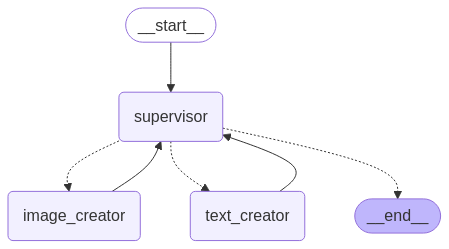

In [8]:
from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [9]:
result = app.invoke(
    {"messages":[
        {
            "role": "user",
            "content": "I need a summary of the following book: The alquemist"
        }
    ]}
)

result

{'messages': [HumanMessage(content='I need a summary of the following book: The alquemist', additional_kwargs={}, response_metadata={}, id='878e1251-a0b1-4205-a053-dc3842a30d96'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_PUfKoZQdNJNiyNJqCIGxAUo5', 'function': {'arguments': '{}', 'name': 'transfer_to_text_creator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 103, 'total_tokens': 116, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_ded0d14823', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe

In [11]:
inputs = {"messages": ["I need a picture of a simple tree"]}

for output in app.stream(inputs):

    for key, value in output.items():
        print(f"output from node {key} ")
        print("----")
        print(value)

output from node supervisor 
----
{'messages': [HumanMessage(content='I need a picture of a simple tree', additional_kwargs={}, response_metadata={}, id='f49009f1-b28d-49a9-be81-5aa80890c43f'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rJshWbT5COdz8qTHk2tEbqmu', 'function': {'arguments': '{}', 'name': 'transfer_to_image_creator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 98, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_ded0d14823', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'seve